In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

In [38]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [5]:
# criterion="entropy"
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9259259259259259

In [6]:
# criterion="gini"
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.8888888888888888

In [7]:
feature_name = ['酒精', '苹果酸', '灰', '灰的碱性', '镁', '总酚', '类黄酮', '非黄烷类酚类', '花青素', '颜色强度', '色调', 'od280/od315稀释葡萄酒', '脯氨酸']
print(*zip(feature_name, clf.feature_importances_))

('酒精', 0.4020438081634188) ('苹果酸', 0.024077452450192362) ('灰', 0.0) ('灰的碱性', 0.0) ('镁', 0.0) ('总酚', 0.0) ('类黄酮', 0.46436731190918773) ('非黄烷类酚类', 0.0) ('花青素', 0.0) ('颜色强度', 0.0) ('色调', 0.08540962977680643) ('od280/od315稀释葡萄酒', 0.024101797700394764) ('脯氨酸', 0.0)


In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)  # 返回预测的准确度
print(score)

0.9259259259259259


In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random")
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)  # 返回预测的准确度
print(score)

0.8888888888888888


In [10]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="best")
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)  # 返回预测的准确度
print(score)

0.9259259259259259


In [11]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random", max_depth=3,
                                  min_samples_leaf=10, min_samples_split=10)
clf = clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9032258064516129
0.8703703703703703


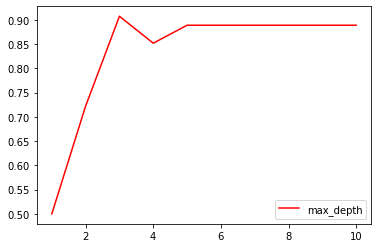

[0 0 2 0 2 1 2 0 0 1 1 2 2 0 2 2 1 2 2 0 0 0 0 0 2 1 1 2 0 0 2 0 2 1 2 0 0
 1 2 2 0 2 2 1 0 2 1 1 1 1 1 2 1 2]


In [12]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i + 1
                                      , criterion="entropy"
                                      , random_state=30
                                      , splitter="random")
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1, 11), test, color="red", label="max_depth")
plt.legend()
plt.show()
print(clf.predict(x_test))

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()

In [14]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [15]:
boston.target.shape

(506,)

In [16]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="r2").mean()

-0.029789843576721542

In [17]:
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring="neg_mean_squared_error")

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [18]:
import numpy as np

In [20]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
X

array([[5.71874087e-04],
       [9.14413867e-02],
       [9.68347894e-02],
       [1.36937966e-01],
       [1.95273916e-01],
       [2.49767295e-01],
       [2.66812726e-01],
       [4.25221057e-01],
       [4.61692974e-01],
       [4.91734169e-01],
       [5.11672144e-01],
       [5.16130033e-01],
       [6.50142861e-01],
       [6.87373521e-01],
       [6.96381736e-01],
       [7.01934693e-01],
       [7.33642875e-01],
       [7.33779454e-01],
       [8.26770986e-01],
       [8.49152098e-01],
       [9.31301057e-01],
       [9.90507445e-01],
       [1.02226125e+00],
       [1.05814058e+00],
       [1.32773330e+00],
       [1.40221996e+00],
       [1.43887669e+00],
       [1.46807074e+00],
       [1.51166286e+00],
       [1.56712089e+00],
       [1.57757816e+00],
       [1.72780364e+00],
       [1.73882930e+00],
       [1.98383737e+00],
       [1.98838418e+00],
       [2.07027994e+00],
       [2.07089635e+00],
       [2.08511002e+00],
       [2.08652401e+00],
       [2.09597257e+00],


In [23]:
Y = np.sin(X).ravel()
Y

array([ 5.71874056e-04,  9.13140084e-02,  9.66835240e-02,  1.36510390e-01,
        1.94035253e-01,  2.47178482e-01,  2.63658285e-01,  4.12522163e-01,
        4.45464463e-01,  4.72155294e-01,  4.89635918e-01,  4.93517994e-01,
        6.05300129e-01,  6.34509327e-01,  6.41446076e-01,  6.45696215e-01,
        6.69579781e-01,  6.69681218e-01,  7.35748344e-01,  7.50720534e-01,
        8.02397078e-01,  8.36304301e-01,  8.53289303e-01,  8.71444956e-01,
        9.70605329e-01,  9.85824622e-01,  9.91311217e-01,  9.94728365e-01,
        9.98252126e-01,  9.99993246e-01,  9.99977003e-01,  9.87699652e-01,
        9.85915646e-01,  9.15904395e-01,  9.14069859e-01,  8.77830014e-01,
        8.77534605e-01,  8.70630546e-01,  8.69934082e-01,  8.65235592e-01,
        8.60400242e-01,  7.84646075e-01,  6.31686553e-01,  5.37227991e-01,
        4.58019714e-01,  4.45838347e-01,  4.32721158e-01,  3.41153283e-01,
        2.67699531e-01,  2.07303185e-01,  1.93830272e-01, -1.76451855e-01,
       -2.09188375e-01, -

In [39]:
rng = np.random.RandomState(1) #随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0) #生成0~5之间随机的x的取值，并排序
Y = np.sin(X).ravel() #生成正弦曲线，由二维数据变成一维
print(Y)
Y[::5] += 3 * (0.5 - rng.rand(16)) #在正弦曲线上加噪声，步长为5
print(Y)

[ 5.71874056e-04  9.13140084e-02  9.66835240e-02  1.36510390e-01
  1.94035253e-01  2.47178482e-01  2.63658285e-01  4.12522163e-01
  4.45464463e-01  4.72155294e-01  4.89635918e-01  4.93517994e-01
  6.05300129e-01  6.34509327e-01  6.41446076e-01  6.45696215e-01
  6.69579781e-01  6.69681218e-01  7.35748344e-01  7.50720534e-01
  8.02397078e-01  8.36304301e-01  8.53289303e-01  8.71444956e-01
  9.70605329e-01  9.85824622e-01  9.91311217e-01  9.94728365e-01
  9.98252126e-01  9.99993246e-01  9.99977003e-01  9.87699652e-01
  9.85915646e-01  9.15904395e-01  9.14069859e-01  8.77830014e-01
  8.77534605e-01  8.70630546e-01  8.69934082e-01  8.65235592e-01
  8.60400242e-01  7.84646075e-01  6.31686553e-01  5.37227991e-01
  4.58019714e-01  4.45838347e-01  4.32721158e-01  3.41153283e-01
  2.67699531e-01  2.07303185e-01  1.93830272e-01 -1.76451855e-01
 -2.09188375e-01 -2.49907779e-01 -2.80682239e-01 -2.86826010e-01
 -3.12470754e-01 -3.14585948e-01 -3.24429114e-01 -3.49651545e-01
 -4.43974821e-01 -4.69211

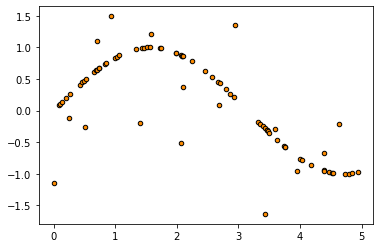

In [40]:
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black",c="darkorange", label="data")

In [41]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, Y)
regr_2.fit(X, Y)

DecisionTreeRegressor(max_depth=5)

In [42]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
X_test

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [43]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

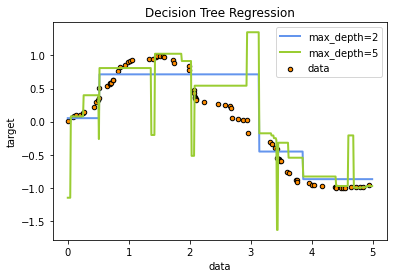

In [44]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()